




# Power Production Project
***

#### Project Question
***

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.

#### Project Analysis
***

As part of this project we were tasked with reviewing and analysing a dataset for speed and power, using this data set we then we asked to train a model to predict the power output after a user inputs a wind speed. The final task was to output this on a user interface using a python package Flask.

This Jupyter notebook will review all the above tasks. Initially we will review the data, train three models and review there benefits and finally pick the best fit to complete the Flask task.

We start analysing the data by import a number of packages.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We can then import the CSV file as a dataframe in pandas and output the top 20 rows to begin to gain a perspective on the data.

In [24]:
df = pd.read_csv (r'powerproduction.csv')
df.head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


The next number of checks is to review data types and to see if there is any blanks

In [9]:
df.dtypes

speed    float64
power    float64
dtype: object

In [10]:
df.isnull().values.any()

False

The next method we can call on the dataframe is to "descirbe()" which gives more of an insight into the dataset.

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,500.0,12.590398,7.224991,0.0,6.32475,12.5505,18.77525,25.000
power,500.0,48.014584,41.614572,0.0,5.28800,41.6455,93.53700,113.556


Individually, all the above steps help in understanding the data however after reviewing all steps together we can make a number of assumptions. The dataset contains two number columns "speed" and "power". Both columns are made up of datapoints of floating point numbers and we have no null values (blank cells). 500 samples with a mean wind speed value of 12.59 m/s and a mean power output 48.01 w. 

As we can see from the df.head(20) method above - there are a number of Zero power output from a non-zero wind speed. These error may be down to a number of factors, however must remove these outliers from our model as we require an ideal out.

We can now split the dataframe into Zero and non-Zero output.

In [27]:
#df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3)], axis=1)
df_remove_power_Zero =  df[df.power != 0]
df_all_zero_power = df[df.power ==0]
df_remove_power_Zero.head(20)

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


We can now review the impact the outliers have on the dataframe. There were 49 Zero power out outliers. The Mean for both the speed and power has increase, which is to be expected, to 13m/s and 53.23w respectively.

In [28]:
df_remove_power_Zero.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,451.0,13.004302,6.835979,0.325,7.3445,13.038,18.7815,24.399
power,451.0,53.231246,40.522055,0.067,8.5435,58.168,94.7255,113.556


At this point plotting the data will give a further understanding of how the data is behaving. From the graph, below we can see, as the wind speed increases so dose the power output. The windspeed from 0-10 m/s has a relatively low power output. From a wind speed of 10-20 has a significant power output increase as the we increment up through the datapoints. From 20-25m/s windspeed we ave a similar plato in power output as in the earlier 0-10m/s

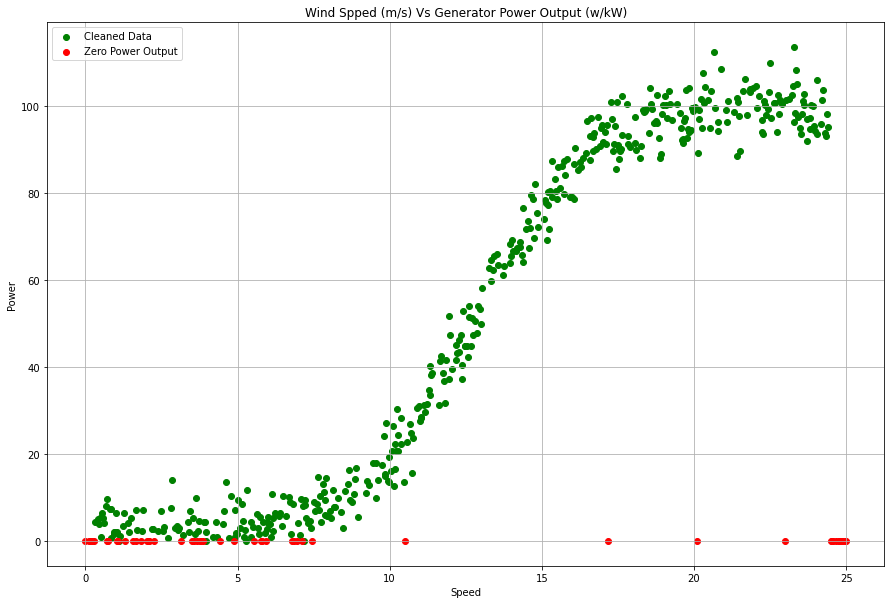

In [31]:
plt.figure(figsize=(15,10))
plt.scatter(df_remove_power_Zero['speed'],df_remove_power_Zero['power'],color='green', label="Cleaned Data")
plt.scatter(df_all_zero_power['speed'],df_all_zero_power['power'],color='red', label="Zero Power Output")
plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

Having reviewed the data we can now review the relationships it follows using the following machine learning models. 
1. Linear Regression
2. k Nearest Neighbour
3. Neural Network

We can now import all the relevant packages to produce these models.

In [29]:
import sklearn.linear_model as lin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
X = df_remove_power_Zero.values[:,0]
Y = df_remove_power_Zero.values[:,1]

In [31]:
X_reshape =  X.reshape(-1, 1)
Y_reshape = Y.reshape(-1,1)

In [32]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_reshape, Y, test_size=0.20, random_state=7)

In [33]:
lin_reg_model = lin.LinearRegression().fit(X_train,Y_train)

In [34]:
r = lin_reg_model.score(X_validation, Y_validation)

In [35]:
print(r)

0.9038134283916828


In [37]:
all_lin_reg = lin.LinearRegression().fit(X_reshape,Y_reshape)

In [38]:
all_lin_reg.predict(np.array([[15]]))[0]

array([64.44473211])

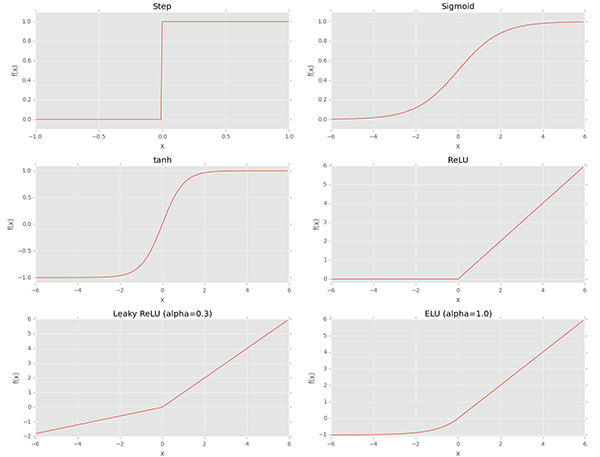

Source for the image: https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

Sources:
    https://www.duo.uio.no/bitstream/handle/10852/57735/Master_Thesis_Finn_Erik_20170525_FINAL.pdf?isAllowed=y&sequence=7

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn.linear_model as lin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
from tensorflow import keras

In [69]:
df = pd.read_csv (r'powerproduction.csv')

In [70]:
df_remove_power_Zero =  df[df.power != 0]

In [71]:
X = df_remove_power_Zero.values[:,0]
Y = df_remove_power_Zero.values[:,1]

In [72]:
X_reshape =  X.reshape(-1, 1)
Y_reshape = Y.reshape(-1,1)

In [73]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_reshape, Y, test_size=0.10, random_state=7)

Linear Regression

In [74]:
lin_reg_model = lin.LinearRegression().fit(X_train,Y_train)
r = lin_reg_model.score(X_validation, Y_validation)
print(r)

0.8914072142194885


In [75]:
all_lin_reg = lin.LinearRegression().fit(X_reshape,Y_reshape)
all_lin_reg.predict(np.array([[15]]))[0]

array([64.44473211])

In [36]:
Y_pred = lin_reg_model.predict(X_validation)
#print(Y_pred[2])
for i in range(0,len(Y_pred)):
    a = X_validation[i]
    b = round(Y_pred[i],3)
    c = round(Y_validation[i],3)
    print("Wind Speed: "+ str(a) +"\nPREDICTED VALUE:" + str(b) + ", ACTUAL VALUE:" +str(c) + "\nPERCENTAGE DIFFERENCE: "+ str(round((((b/c)-1)*100),3)) +"%\n")

Wind Speed: [10.561]
PREDICTED VALUE:39.465, ACTUAL VALUE:22.758
PERCENTAGE DIFFERENCE: 73.412%

Wind Speed: [22.723]
PREDICTED VALUE:108.234, ACTUAL VALUE:93.964
PERCENTAGE DIFFERENCE: 15.187%

Wind Speed: [24.349]
PREDICTED VALUE:117.428, ACTUAL VALUE:93.078
PERCENTAGE DIFFERENCE: 26.161%

Wind Speed: [22.523]
PREDICTED VALUE:107.103, ACTUAL VALUE:97.256
PERCENTAGE DIFFERENCE: 10.125%

Wind Speed: [9.309]
PREDICTED VALUE:32.386, ACTUAL VALUE:12.881
PERCENTAGE DIFFERENCE: 151.425%

Wind Speed: [20.17]
PREDICTED VALUE:93.798, ACTUAL VALUE:96.963
PERCENTAGE DIFFERENCE: -3.264%

Wind Speed: [5.681]
PREDICTED VALUE:11.872, ACTUAL VALUE:3.036
PERCENTAGE DIFFERENCE: 291.041%

Wind Speed: [10.11]
PREDICTED VALUE:36.915, ACTUAL VALUE:26.427
PERCENTAGE DIFFERENCE: 39.687%

Wind Speed: [20.571]
PREDICTED VALUE:96.066, ACTUAL VALUE:103.405
PERCENTAGE DIFFERENCE: -7.097%

Wind Speed: [14.364]
PREDICTED VALUE:60.969, ACTUAL VALUE:76.551
PERCENTAGE DIFFERENCE: -20.355%

Wind Speed: [23.248]
PREDICT

k Nearest Neighbours

In [76]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, Y_train)
k = knn.score(X_validation, Y_validation)
print(k)

0.9888387901081984


In [77]:
all_knn = KNeighborsRegressor(n_neighbors=5).fit(X_reshape,Y_reshape)
all_knn.predict(np.array([[15]]))[0]

array([75.5042])

In [108]:
#https://keras.io/guides/sequential_model/
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_shape=(1,), activation="tanh"))
model.add(keras.layers.Dense(1, input_shape=(1,), activation="linear"))
#model.add(keras.layers.Dense(1, output_shape=(1,)))
model.compile('adam',loss='mean_squared_error')

In [109]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 31        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 0s 1ms/step - loss: 4239.9798
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 4482.0204
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 3859.7329
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 3995.8161
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 3889.1895
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 4102.6188
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 4063.5751
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 3592.8755
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 3994.8871
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 3767.1343
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 3570.6781
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 3496.9184
E

13/13 [==============================] - 0s 1ms/step - loss: 520.9057
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 513.9437
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 525.7789
Epoch 198/500
13/13 [==============================] - 0s 2ms/step - loss: 482.8927
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 470.9570
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 447.3748
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 508.3781
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 483.1426
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 457.6772
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 473.4867
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 430.9420
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 438.4666
Epoch 

Epoch 292/500
13/13 [==============================] - 0s 1ms/step - loss: 119.1276
Epoch 293/500
13/13 [==============================] - 0s 1ms/step - loss: 119.6051
Epoch 294/500
13/13 [==============================] - 0s 1ms/step - loss: 112.3021
Epoch 295/500
13/13 [==============================] - 0s 1ms/step - loss: 112.8498
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 119.4166
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 94.5476
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 110.8153
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 110.3908
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 100.8546
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 92.3785
Epoch 302/500
13/13 [==============================] - 0s 1ms/step - loss: 99.4432
Epoch 303/500
13/13 [==============================] - 0s 1ms/step - loss: 112.

13/13 [==============================] - 0s 1ms/step - loss: 17.7215
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 17.1683
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 16.6118
Epoch 491/500
13/13 [==============================] - 0s 2ms/step - loss: 18.0937
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 16.9977
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 17.0939
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 18.5794
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 18.1493
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 16.3294
Epoch 497/500
13/13 [==============================] - 0s 1ms/step - loss: 19.7839
Epoch 498/500
13/13 [==============================] - 0s 1ms/step - loss: 17.5487
Epoch 499/500
13/13 [==============================] - 0s 1ms/step - loss: 18.1123
Epoch 500/500
13/1

In [85]:
X_train.size

405

In [86]:
Y_train.size

405

In [87]:
X_validation.size

46

In [88]:
Y_validation.size

46

In [91]:
pred = model.predict(X_validation)
pred.size

1380

In [111]:
model.predict([6.5]).size

1

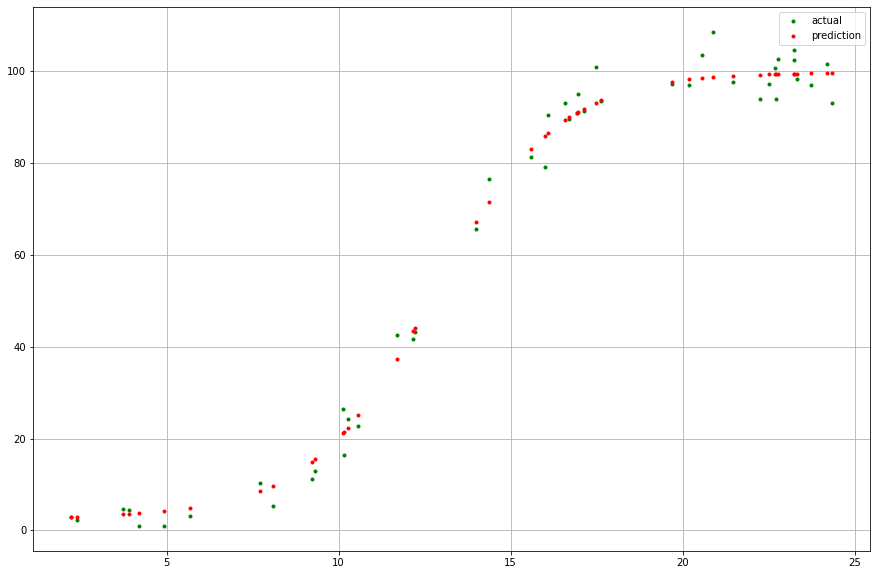

In [112]:
plt.figure(figsize=(15,10))
plt.plot(X_validation,Y_validation,'g.' , label='actual')
plt.plot(X_validation,model.predict(X_validation), 'r.', label='prediction')
plt.grid()
plt.legend()

In [114]:
model.save("powerpred.h5")

1. https://medium.com/@luwei.io/logistic-regression-with-keras-d75d640d175e
2. https://aigeekprogrammer.com/binary-classification-using-logistic-regression-and-keras/
3. https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789132212/1/ch01lvl1sec15/logistic-regression-with-keras
4. https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3
5. https://tomroth.com.au/keras/
6. https://curiousily.com/posts/deploy-keras-deep-learning-project-to-production-with-flask/
7. https://towardsdatascience.com/deploying-keras-deep-learning-models-with-flask-5da4181436a2
8. https://medium.com/datadriveninvestor/flask-api-for-keras-87c06da174e8